In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Load dataset
datadf = pd.read_csv('data_banknote_authentication.txt', header=None)



In [3]:
#import the libraries and create a dataframe


In [5]:
# Assign column names
datadf.columns = ['f1', 'f2', 'f3', 'f4', 'label']

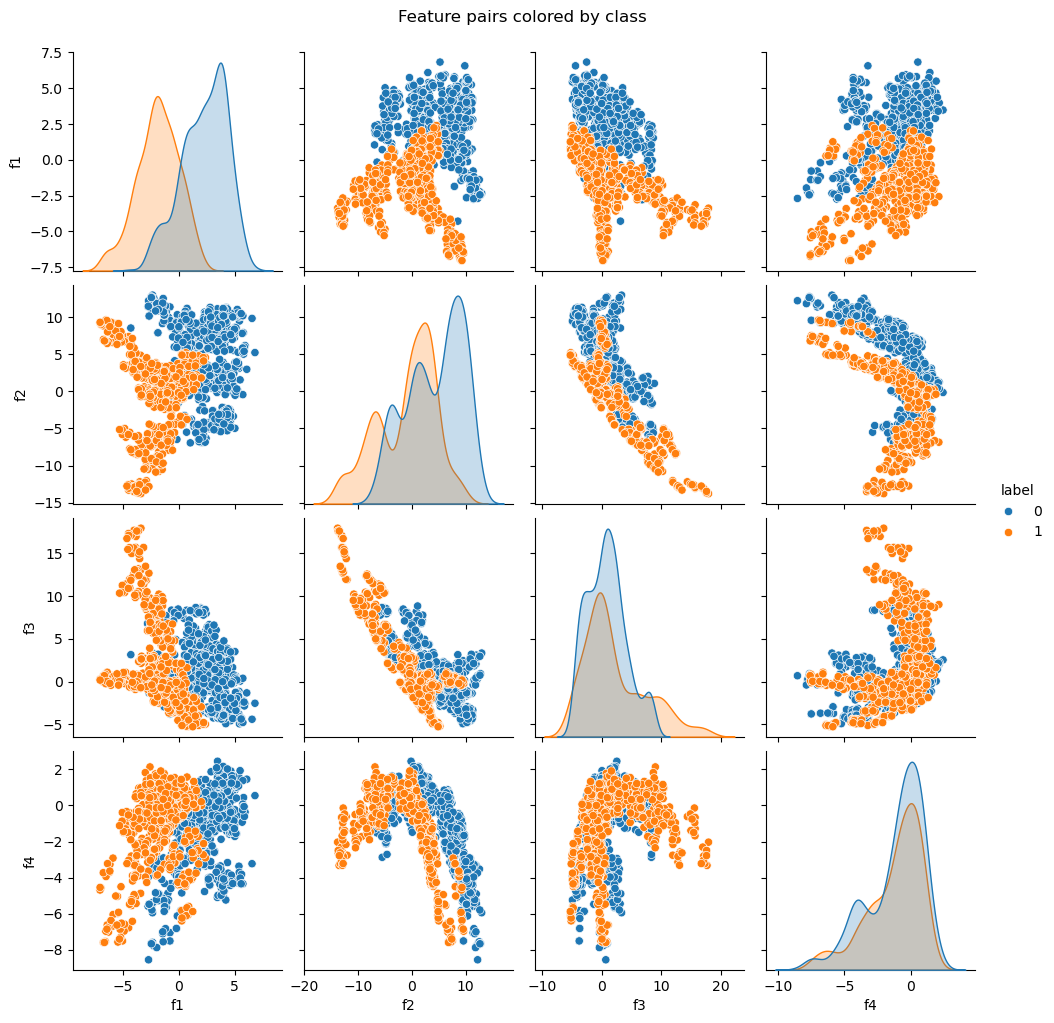

In [7]:
# Visualize the features in pairs using pairplot
sns.pairplot(datadf, hue='label', diag_kind='kde')
plt.suptitle("Feature pairs colored by class", y=1.02)
plt.show()

In [18]:
# Features and labels
features = datadf[['f1', 'f2', 'f3', 'f4']]
classlabels = datadf['label']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, classlabels, test_size=0.2, random_state=42, stratify=classlabels)

In [16]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

In [24]:
# Train the model with different parameters using GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10,15,20],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


In [26]:
# Use the best model from grid search
best_clf = grid_search.best_estimator_

# Evaluate the model
y_pred = best_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       153
           1       0.98      0.99      0.98       122

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



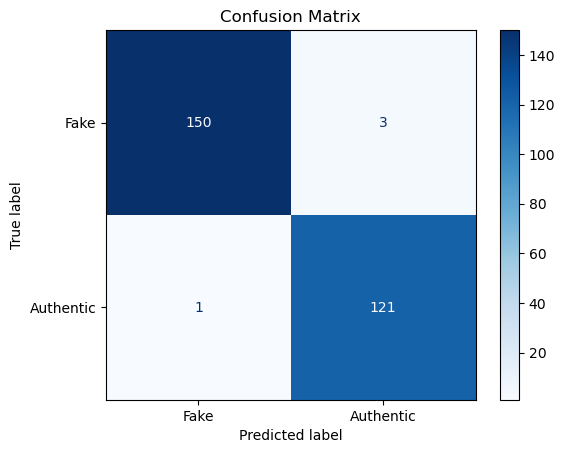

In [28]:
# Confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(best_clf, X_test, y_test, display_labels=["Fake", "Authentic"], cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

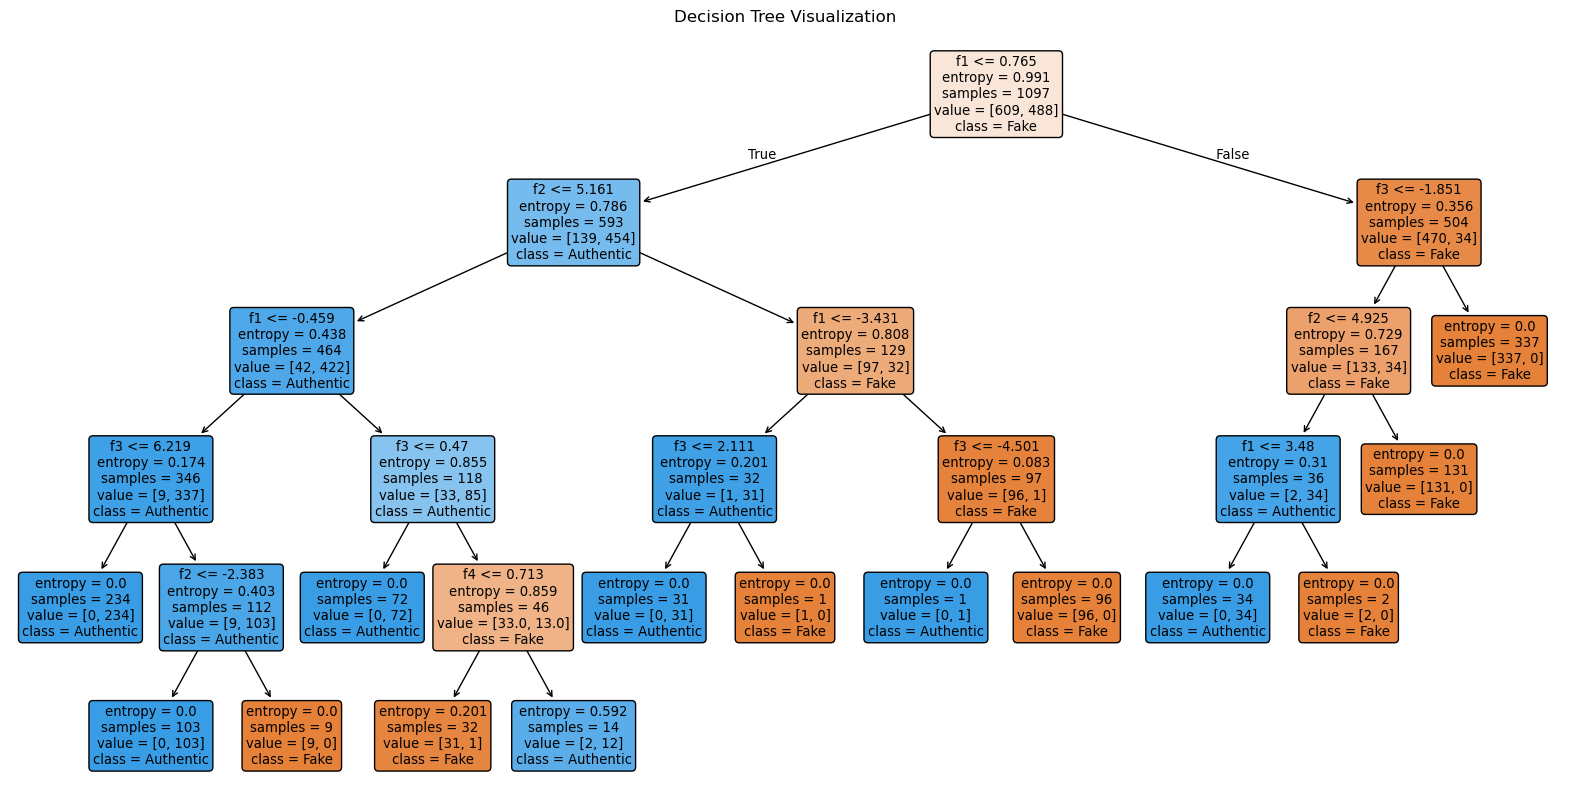

In [30]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=['f1', 'f2', 'f3', 'f4'], class_names=['Fake', 'Authentic'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

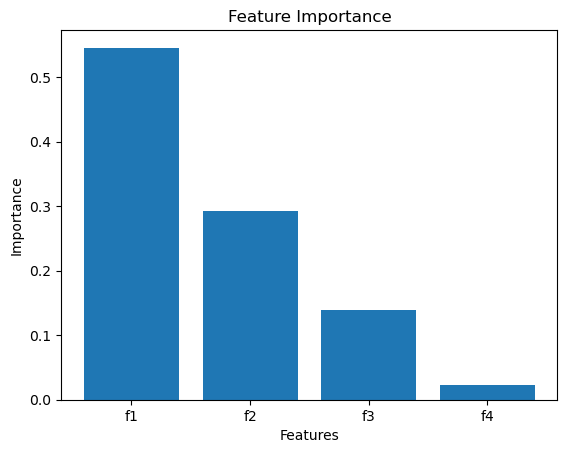

In [32]:
# Plot feature importance
feature_importance = best_clf.feature_importances_
plt.bar(features.columns, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()